# Basemap 

In the following example we use Pandas to read in a table into a DataFrame and generate a map using the Basemap module.

Tsunami event data downloaded from NOAA/WDS Global Historical Tsunami Database from NGDC
http://www.ngdc.noaa.gov/hazard/tsu_db.shtml

In [26]:
%pylab inline
import pandas as pd 
D=pd.read_table('data/tsrunup.txt',encoding = "ISO-8859-1",usecols=[2,3,4,9,11,12,13,26])

Populating the interactive namespace from numpy and matplotlib


In [29]:
D.head()

,YEAR,MONTH,DAY,COUNTRY,LOCATION_NAME,LATITUDE,LONGITUDE,DEATHS
0,-2000,NaN,NaN,SYRIA,UGARIT,35.583,35.75,NaN
1,-1610,NaN,NaN,GREECE,N. AND E. COAST CRETE,35.500,25.00,NaN
2,-1610,NaN,NaN,SYRIA,UGARIT,35.583,35.75,NaN
3,-479,NaN,NaN,GREECE,"POTIDAEA, MACEDONIA",40.300,23.33,NaN
4,-426,6.0,NaN,GREECE,THERMOPLYLES,38.800,22.55,NaN


In [30]:
index=D['DEATHS']>1 # Sort out cases only with reported deaths
D=D[index]

## Basemap visualization

/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


Text(0.5,1,'Tsunami events')

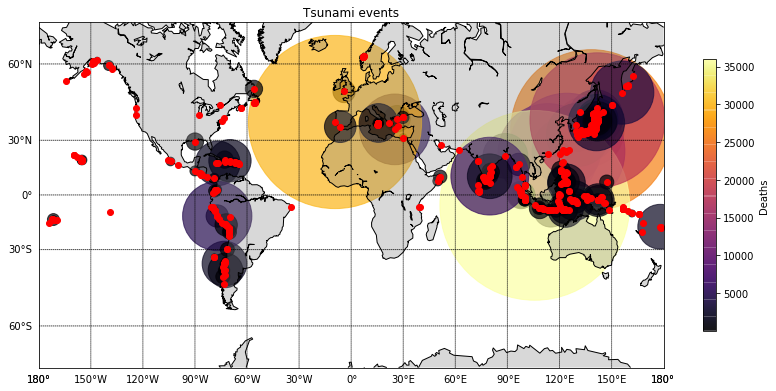

In [51]:
from mpl_toolkits.basemap import Basemap


figure(figsize=(14,10))

m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=0,resolution='c')


m.drawcoastlines()
m.fillcontinents(color='grey',alpha=0.3)
# draw parallels and meridians.
m.drawparallels(arange(-90.,91.,30.),labels=(True,False,False,False))
m.drawmeridians(arange(-180.,181.,30.),labels=(False,False,False,True))
x,y=m(D['LONGITUDE'].values,D['LATITUDE'].values)
scatter(x,y,c=D['DEATHS'].values,s=D['DEATHS'].values,alpha=0.7,cmap=cm.inferno)
plot(x,y,'ro')

colorbar(shrink=0.5,label='Deaths')
title("Tsunami events")

# Exercises

 * Draw a map of the Mediterranean Sea in higher resolution
 * Use the method D.sort_values(by=.. to show the 10 worst cases